In [51]:
import numpy as np
import matplotlib.pyplot as plt
from python_utils import *
import copy
import math

In [52]:
import pandas as pd
data=pd.read_csv("/Users/hussamuddin/Downloads/Churn_Modelling.csv")

In [53]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
data.shape

(10000, 14)

In [55]:
y=data['Exited']
x=data.drop('Exited',axis=1)

In [56]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [57]:
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [58]:
x=x.drop('RowNumber', axis=1)

In [59]:
x=x.drop('Surname',axis=1)

In [60]:
x.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [61]:
pd.unique(x['Geography'])

array(['France', 'Spain', 'Germany'], dtype=object)

In [62]:
from sklearn import preprocessing

In [63]:
label=preprocessing.LabelEncoder()

In [64]:
x['Geography']=label.fit_transform(x['Geography'])
x['Gender']=label.fit_transform(x['Gender'])

In [65]:
x.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10


<Axes: >

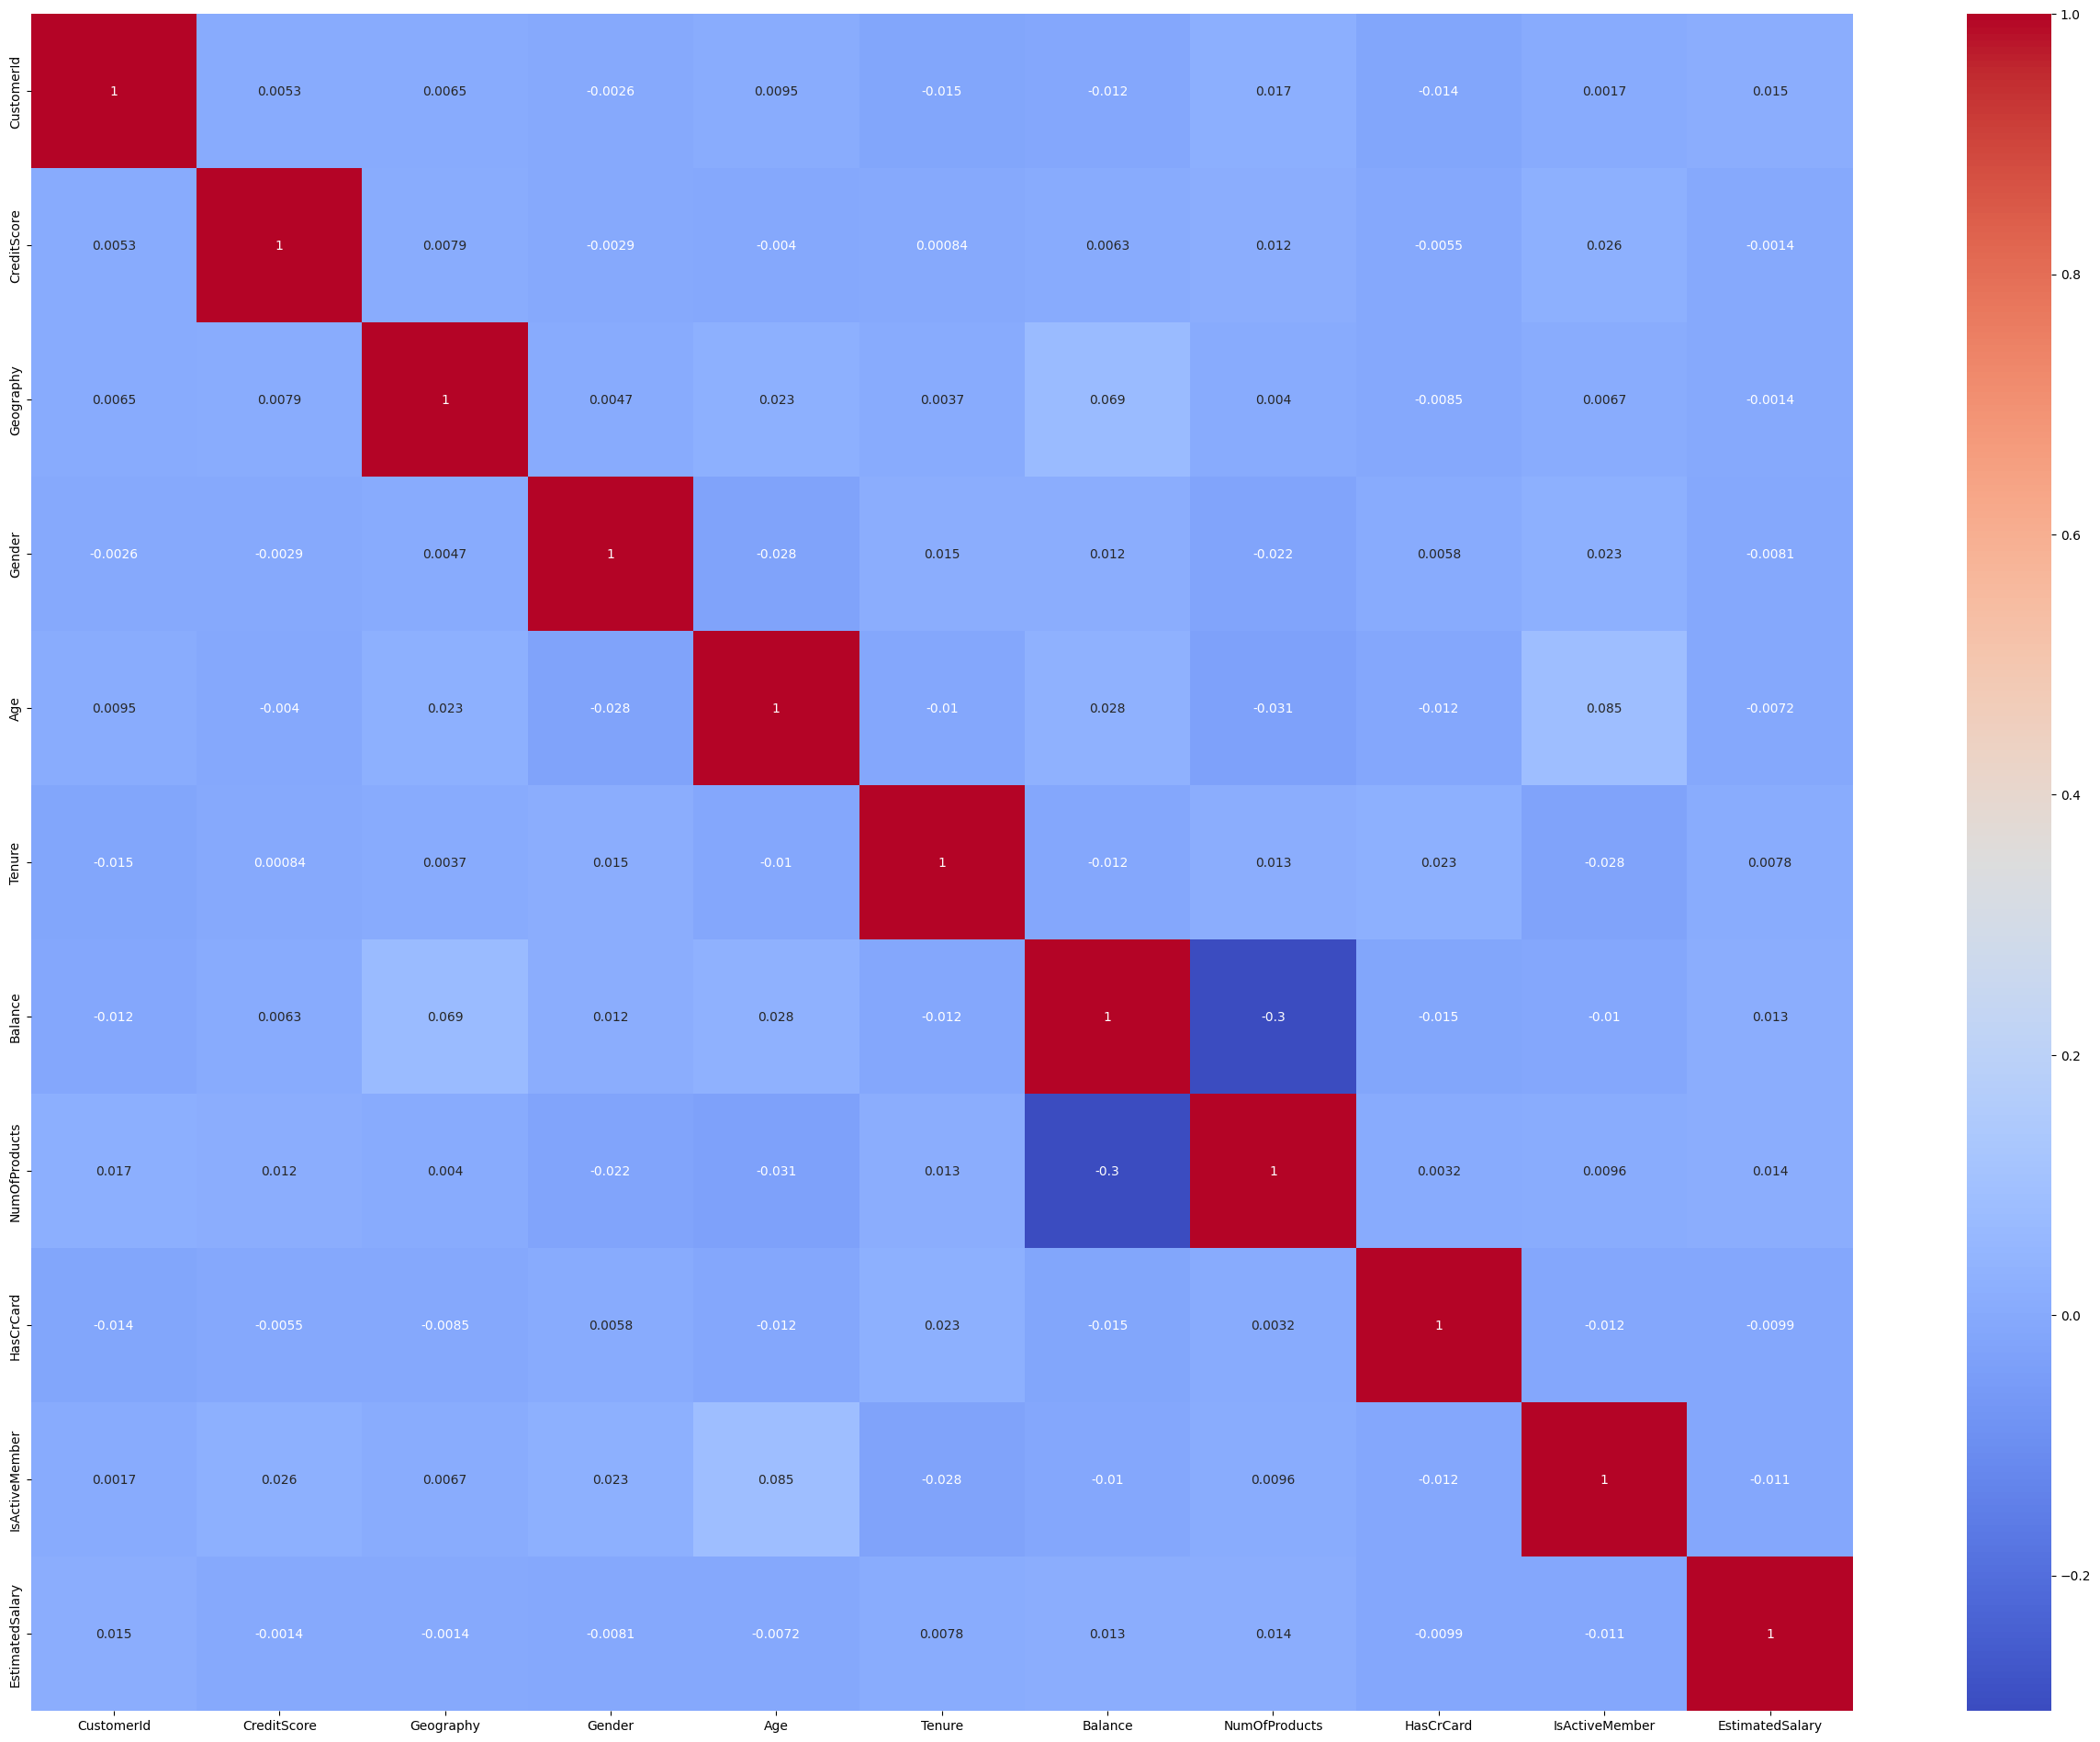

In [67]:
import seaborn as sns
corr=x.corr()
plt.figure(figsize=(32,24))
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [68]:
x=x.to_numpy()
y=y.to_numpy()

In [69]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x = scaler.fit_transform(x.data)

In [70]:
x[0:5,:-1]

array([[0.27561613, 0.538     , 0.        , 0.        , 0.32432432,
        0.2       , 0.        , 0.        , 1.        , 1.        ],
       [0.32645436, 0.516     , 1.        , 0.        , 0.31081081,
        0.1       , 0.33403148, 0.        , 0.        , 1.        ],
       [0.21442143, 0.304     , 0.        , 0.        , 0.32432432,
        0.8       , 0.63635718, 0.66666667, 1.        , 0.        ],
       [0.54263588, 0.698     , 0.        , 0.        , 0.28378378,
        0.1       , 0.        , 0.33333333, 0.        , 0.        ],
       [0.68877831, 1.        , 1.        , 0.        , 0.33783784,
        0.2       , 0.50024622, 0.        , 1.        , 1.        ]])

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=32)

In [72]:
#defining the sigmoid function 

def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [73]:
#test sigmoid funtion
value = 0
print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


In [74]:
def cost_func(x,y,w,b,*argv):
    m , n = x.shape
    z=np.zeros(m)
    g=np.zeros(m)
    loss=np.zeros(m)
    total_cost=0

    for i in range(m):
        for j in range (n):
            z[i]+=w[j]*x[i,j]
        z[i]+=b    
        g[i]=sigmoid(z[i])
        loss[i]=(-y[i]*np.log(g[i])-(1-y[i])*np.log(1-g[i]))
        total_cost+=loss[i]
    total_cost/=m
    return total_cost   

In [75]:
m,n=x_train.shape
initial_w = np.zeros(n)
initial_b = 0.
cost = cost_func(x_train, y_train, initial_w, initial_b)
#print(initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [76]:
test_w = np.array([0.01, -0.08,-0.08,-0.1,-0.1,-0.1,-0.8,0.2,-0.08,-0.09,-0.1])
test_b = -2
cost = cost_func(x_train, y_train, test_w, test_b)
print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))

Cost at test w and b (non-zeros): 0.604


In [77]:
#gradient descent algorithm
def grad_find(x,y,w,b,*argv):
    m,n=x.shape
    z=np.zeros(m)
    g=np.zeros(m)
    dj_db=0.
    dj_dw=np.zeros(w.shape)
    for i in range(m):
        for j in range(n):
            z[i]=w[j]*x[i][j]
        z[i]+=b
        g[i]=sigmoid(z[i])
        dj_db+=g[i]-y[i]
        for k in range(n):
            dj_dw[k]+=(g[i]-y[i])*x[i][k]
    dj_dw/=m
    dj_db/=m
    return dj_db, dj_dw

            

In [79]:
initial_w = np.zeros(11)
initial_b = 0.

dj_db, dj_dw = grad_find(x_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):0.2967142857142857
dj_dw at initial w and b (zeros):[0.14972374298754823, 0.180578142857143, 0.10785714285714286, 0.18228571428571427, 0.06726544401544386, 0.15050000000000066, 0.07957083198031292, 0.05683333333333506, 0.21135714285714285, 0.18314285714285714, 0.14591701536782467]


In [80]:
def gradient_descent(x ,y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    m = len(x)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(x, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<15000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w_in, b_in, lambda_)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history 

In [84]:
initial_w = np.array([0.01, -0.08,-0.08,-0.1,-0.1,-0.1,-0.8,0.2,-0.08,-0.09,-0.1])
initial_b = -1

# Some gradient descent settings
iterations = 1000
alpha = 0.16

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   cost_func, grad_find, alpha, iterations, 0)

Iteration    0: Cost     0.52   
Iteration  100: Cost     0.61   
Iteration  200: Cost     0.65   
Iteration  300: Cost     0.70   
Iteration  400: Cost     0.74   
Iteration  500: Cost     0.79   
Iteration  600: Cost     0.84   
Iteration  700: Cost     0.89   
Iteration  800: Cost     0.93   
Iteration  900: Cost     0.98   
Iteration  999: Cost     1.03   


In [85]:
def predict(x, w, b): 
    m, n = x.shape   
    p = np.zeros(m)
    for i in range(m):   
        z_wb = 0
        for j in range(n): 
            z_wb += w[j]*x[i,j]
        z_wb += b
        f_wb = sigmoid(z_wb)
        if(f_wb>=0.5):
            p[i]=1
        else: 
            p[i]=0
        
    return p

In [90]:
tmp_w = np.random.randn(11)
tmp_b = 0.1    
tmp_X = np.random.randn(11, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (11,), value [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]


In [91]:
p = predict(x_train, w,b)
print(w)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

[-0.33062396 -0.69799261  0.51127955 -3.54537695  2.46053495 -0.63253558
  0.82089242 -0.48288544 -0.60009731 -5.24569849  0.10326784]
Train Accuracy: 79.771429


In [92]:
#since logistic regression gives accuracy <80%, we are opting for Random Forest Algorithm
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()


In [93]:
def compute_entropy(y):
    entropy = 0.
    if (len(y)!=0):
        p1 = len(y[y == 1]) / len(y)
        if(p1!=0 and p1!=1):
            entropy= -p1 * np.log2(p1) - (1 - p1) * np.log2(1 - p1)
        else:
            entropy=0
    
    return entropy

In [94]:
print("Entropy at root node: ", compute_entropy(y_train)) 

Entropy at root node:  0.7284510490461167


In [104]:
def split_dataset(X, node_indices, feature):
    left_indices = []
    right_indices = []
    
    for i in node_indices:
        if X[i][feature]>=0.8:
            left_indices.append(i)
        else:
            right_indices.append(i)
        
    return left_indices, right_indices

In [105]:
x_train.shape

(7000, 11)

In [106]:
root_indices =[]
for i in range (7000):
    root_indices.append(i)


for feature in range (11):
    left_indices, right_indices = split_dataset(x_train, root_indices, feature)

    print("CASE:")
    print("Left indices length: ", len(left_indices))
    print("Right indices length: ", len(right_indices))

CASE:
Left indices length:  1412
Right indices length:  5588
CASE:
Left indices length:  1108
Right indices length:  5892
CASE:
Left indices length:  1775
Right indices length:  5225
CASE:
Left indices length:  3826
Right indices length:  3174
CASE:
Left indices length:  15
Right indices length:  6985
CASE:
Left indices length:  1744
Right indices length:  5256
CASE:
Left indices length:  21
Right indices length:  6979
CASE:
Left indices length:  39
Right indices length:  6961
CASE:
Left indices length:  4953
Right indices length:  2047
CASE:
Left indices length:  3592
Right indices length:  3408
CASE:
Left indices length:  1388
Right indices length:  5612


In [107]:
def compute_information_gain(X, y, node_indices, feature):
    
    left_indices, right_indices = split_dataset(x_train, node_indices, feature)
    
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    information_gain = 0
    mid=compute_entropy(y_node)
    left=compute_entropy(y_left)
    right=compute_entropy(y_right)
    wl=len(X_left)/len(X_node)
    wr=len(X_right)/len(X_node)
    information_gain=mid-(wl*left+wr*right)
    return information_gain

In [109]:
info_gain0 = compute_information_gain(x_train, y_train, root_indices, feature=0)
print(info_gain0)

info_gain1 = compute_information_gain(x_train, y_train, root_indices, feature=1)
print(info_gain1)

info_gain2 = compute_information_gain(x_train, y_train, root_indices, feature=2)
print( info_gain2)
##
info_gain3 = compute_information_gain(x_train, y_train, root_indices, feature=3)
print(info_gain3)

info_gain4 = compute_information_gain(x_train, y_train, root_indices, feature=4)
print(info_gain4)

info_gain5 = compute_information_gain(x_train, y_train, root_indices, feature=5)
print(info_gain5)
##
info_gain6 = compute_information_gain(x_train, y_train, root_indices, feature=6)
print(info_gain6)

info_gain7 = compute_information_gain(x_train, y_train, root_indices, feature=7)
print(info_gain7)

info_gain8 = compute_information_gain(x_train, y_train, root_indices, feature=8)
print(info_gain8)
##
info_gain9 = compute_information_gain(x_train, y_train, root_indices, feature=9)
print(info_gain9)

info_gain10 = compute_information_gain(x_train, y_train, root_indices, feature=10)
print( info_gain10)


8.014166235414955e-05
0.00010337554732942067
0.002643978375294731
0.007239841381009415
0.00022726073768930544
1.4899166914661421e-05
0.0017740213108294878
0.012894212626877621
4.268435526111336e-05
0.017155821901422952
0.00014199535704662036


In [110]:
#we have to get the best feature to apply the split on:
def get_best_split(X, y, node_indices):  
    num_features = X.shape[1]
    best_feature = -1
    max_info=0
    
    for feature in range(num_features):
        info_gain=compute_information_gain(X,y,node_indices,feature)
        
        if (info_gain>max_info):
            max_info=info_gain
            best_feature=feature
    return best_feature

In [111]:
best_feature = get_best_split(x_train, y_train, root_indices)
print("Best feature to split on: %d" % best_feature)

Best feature to split on: 9


In [112]:
tree = []
def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return
    best_feature = get_best_split(X, y, node_indices) 
    
    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))
    
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)

In [113]:
build_tree_recursive(x_train, y_train, root_indices, "Root", max_depth=4, current_depth=0)

 Depth 0, Root: Split on feature: 9
- Depth 1, Left: Split on feature: 7
-- Depth 2, Left: Split on feature: -1
--- Depth 3, Left: Split on feature: -1
    ---- Left leaf node with indices [2375, 3079]
    ---- Right leaf node with indices []
--- Depth 3, Right: Split on feature: -1
    ---- Left leaf node with indices []
    ---- Right leaf node with indices [248, 468, 472, 503, 663, 3134, 3205, 4223, 4978, 5031, 5430, 5500, 5891, 5960, 6559, 6993]
-- Depth 2, Right: Split on feature: 3
--- Depth 3, Left: Split on feature: 6
    ---- Left leaf node with indices [1344, 1773, 3160, 6342]
    ---- Right leaf node with indices [1, 7, 8, 13, 15, 18, 20, 21, 32, 33, 34, 39, 41, 43, 49, 53, 54, 61, 62, 63, 65, 71, 75, 77, 79, 80, 81, 93, 97, 99, 102, 104, 107, 109, 110, 113, 115, 116, 117, 118, 120, 124, 127, 133, 134, 137, 138, 139, 144, 146, 148, 152, 154, 163, 176, 179, 187, 189, 190, 192, 197, 204, 207, 219, 220, 221, 223, 228, 233, 238, 241, 245, 251, 252, 254, 255, 256, 257, 259, 260, 

In [114]:
print("Entropy at root node: ", compute_entropy(y_train)) 

Entropy at root node:  0.7284510490461167


In [122]:
#final random forest implementation using sklearn with depth=5
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=120,criterion="entropy", max_depth=8,
                 n_estimators=110, oob_score=True)


classifier_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=110,
                       oob_score=True, random_state=120)

In [123]:
classifier_rf.oob_score_

0.8582857142857143

In [127]:
#hyperparameter tuning for RF using GridSearchCV
r_f=RandomForestClassifier(random_state=55)
parameters= {
    'max_depth':[7,10,13,15,20],
    'min_samples_leaf':[5,25,40,100,150],
    'n_estimators':[10,35,50,135,150]
}
from sklearn.model_selection import GridSearchCV
grid_searchcv_run=GridSearchCV(estimator=r_f,param_grid=parameters,cv=2,scoring="accuracy") 
grid_searchcv_run.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=55),
             param_grid={'max_depth': [7, 10, 13, 15, 20],
                         'min_samples_leaf': [5, 25, 40, 100, 150],
                         'n_estimators': [10, 35, 50, 135, 150]},
             scoring='accuracy')

In [128]:
grid_searchcv_run.best_score_

0.8592857142857142

In [130]:
rf_best = grid_searchcv_run.best_estimator_
rf_best

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=150,
                       random_state=55)